In [138]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA 
import scipy as sp
import datetime

import matplotlib.pylab as plt
import os


import seaborn as sbn
from scipy.stats import norm
from scipy.stats import lognorm
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from pykalman import KalmanFilter
#from johansen import coint_johansen

from datetime import datetime
from dateutil import relativedelta
from scipy.stats import norm
import quandl


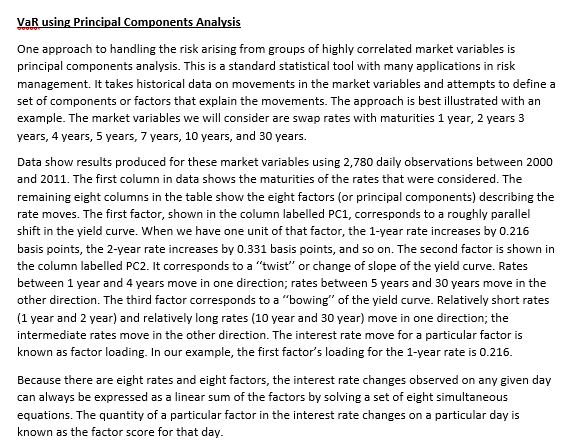

In [139]:
data=pd.read_excel(r"G:\Documents\Documents\Finance work\Swap data for PCA.xlsx",index_col=0)
data.index = pd.to_datetime(data.index)

In [140]:
data

,1yr,2yr,3yr,4yr,5yr,7yr,10yr,30yr
Date,,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19
...,...,...,...,...,...,...,...,...
2011-08-08,0.39,0.50,0.73,1.05,1.41,2.01,2.58,3.44
2011-08-09,0.42,0.54,0.79,1.13,1.48,2.06,2.60,3.41
2011-08-10,0.39,0.42,0.58,0.88,1.22,1.80,2.37,3.25


In [141]:
'''Change in rates for each day and each tenor is calculated in terms of basis points is calculated'''
data['1Y']=(data['1yr'].shift(-1)-data['1yr'])*100
data['2Y']=(data['2yr'].shift(-1)-data['2yr'])*100
data['3Y']=(data['3yr'].shift(-1)-data['3yr'])*100
data['4Y']=(data['4yr'].shift(-1)-data['4yr'])*100
data['5Y']=(data['5yr'].shift(-1)-data['5yr'])*100
data['7Y']=(data['7yr'].shift(-1)-data['7yr'])*100
data['10Y']=(data['10yr'].shift(-1)-data['10yr'])*100
data['30Y']=(data['30yr'].shift(-1)-data['30yr'])*100

In [142]:
data

,1yr,2yr,3yr,4yr,5yr,7yr,10yr,30yr,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y
Date,,,,,,,,,,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24,-7.0,-10.0,-10.0,-10.0,-9.0,-9.0,-10.0,-8.0
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16,4.0,7.0,7.0,8.0,8.0,8.0,7.0,5.0
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21,-6.0,-9.0,-8.0,-9.0,-9.0,-9.0,-7.0,-7.0
2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14,3.0,5.0,5.0,7.0,7.0,7.0,6.0,5.0
2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-08,0.39,0.50,0.73,1.05,1.41,2.01,2.58,3.44,3.0,4.0,6.0,8.0,7.0,5.0,2.0,-3.0
2011-08-09,0.42,0.54,0.79,1.13,1.48,2.06,2.60,3.41,-3.0,-12.0,-21.0,-25.0,-26.0,-26.0,-23.0,-16.0
2011-08-10,0.39,0.42,0.58,0.88,1.22,1.80,2.37,3.25,5.0,4.0,4.0,5.0,3.0,3.0,1.0,1.0


In [143]:
'''Using PCA function from sklearn decomposition'''
pca = PCA(n_components = 8) 
  
X_train = pca.fit_transform(data.iloc[:,8:].dropna()) 

In [144]:
Factor_Loadings=pd.DataFrame(pca.components_).T

In [145]:
Factor_Loadings.columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'] 

In [146]:
Factor_Loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.215540,-0.500585,0.627480,-0.486669,-0.121978,-0.237078,-0.011336,-0.034151
1,-0.330778,-0.428588,0.129421,0.353780,0.212477,0.673888,0.100144,0.235982
2,-0.372106,-0.267036,-0.156955,0.413752,0.095822,-0.310957,-0.413236,-0.563705
3,-0.391521,-0.109500,-0.255936,0.174143,0.018986,-0.551078,0.415905,0.511730
4,-0.404048,0.018544,-0.355374,-0.269104,-0.594754,0.277983,0.316068,-0.326784
5,-0.393839,0.193518,-0.194588,-0.336079,-0.006898,0.099898,-0.684780,0.421519
6,-0.375578,0.370570,0.067806,-0.304746,0.683616,0.039278,0.277903,-0.279368
7,-0.304885,0.554358,0.575003,0.397793,-0.330638,-0.022152,-0.007014,0.031680


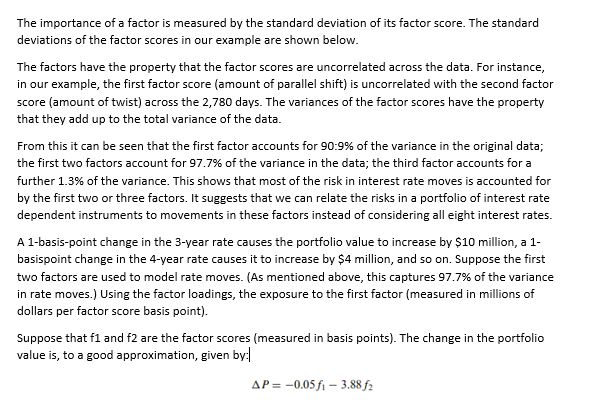

In [147]:
stdev_factor_scores=pd.DataFrame(np.sqrt(pca.explained_variance_)).T

In [148]:
stdev_factor_scores.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']

In [149]:
stdev_factor_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,17.556876,4.769801,2.077894,1.291778,0.913727,0.732656,0.556021,0.527974


In [150]:
explain=pd.DataFrame(pca.explained_variance_ratio_*100).T

In [151]:
explain.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']

In [152]:
explain

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,90.943278,6.71238,1.273863,0.492325,0.246325,0.158371,0.091213,0.082244


In [153]:
'''Sample Portfolio exposures in $ millions'''
DV01_3yr=10
DV01_4yr=4
DV01_5yr=-8
DV01_7yr=-7
DV01_10yr=2

In [154]:
'''First Factor exposure measured in millions of dollars per factor score basis point'''
first_factor_exp=DV01_3yr*Factor_Loadings.iloc[2,0] + DV01_4yr*Factor_Loadings.iloc[3,0] + DV01_5yr*Factor_Loadings.iloc[4,0] + DV01_7yr*Factor_Loadings.iloc[5,0] + DV01_10yr*Factor_Loadings.iloc[6,0]

In [155]:
'''Second Factor exposure measured in millions of dollars per factor score basis point'''
second_factor_exp=DV01_3yr*Factor_Loadings.iloc[2,1] + DV01_4yr*Factor_Loadings.iloc[3,1] + DV01_5yr*Factor_Loadings.iloc[4,1] + DV01_7yr*Factor_Loadings.iloc[5,1] + DV01_10yr*Factor_Loadings.iloc[6,1]

In [156]:
stdev_factor_scores.iloc[0,1]

4.769800620613934

In [157]:
'''Standard deviation of the portfolio'''
stddev_portfolio=np.sqrt(first_factor_exp**2*stdev_factor_scores.iloc[0,0]**2  + second_factor_exp**2*stdev_factor_scores.iloc[0,1]**2)  

In [158]:
stddev_portfolio

18.480187681258947

In [159]:
'''1-day 99% VaR in $MM'''
import scipy.stats as st

VaR_99=stddev_portfolio*st.norm.ppf(.99)

In [160]:
VaR_99

42.991345324172485